In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from construct import *

In [2]:
frame_size = 223
frames = np.fromfile('emm_frames.u8', dtype = 'uint8')
frames = frames[:frames.size//frame_size*frame_size].reshape((-1, frame_size))
frames.shape[0]

553

In [3]:
crc_table = [0x0000, 0x1021, 0x2042, 0x3063, 0x4084, 0x50a5, 0x60c6, 0x70e7,
    0x8108, 0x9129, 0xa14a, 0xb16b, 0xc18c, 0xd1ad, 0xe1ce, 0xf1ef,
    0x1231, 0x0210, 0x3273, 0x2252, 0x52b5, 0x4294, 0x72f7, 0x62d6,
    0x9339, 0x8318, 0xb37b, 0xa35a, 0xd3bd, 0xc39c, 0xf3ff, 0xe3de,
    0x2462, 0x3443, 0x0420, 0x1401, 0x64e6, 0x74c7, 0x44a4, 0x5485,
    0xa56a, 0xb54b, 0x8528, 0x9509, 0xe5ee, 0xf5cf, 0xc5ac, 0xd58d,
    0x3653, 0x2672, 0x1611, 0x0630, 0x76d7, 0x66f6, 0x5695, 0x46b4,
    0xb75b, 0xa77a, 0x9719, 0x8738, 0xf7df, 0xe7fe, 0xd79d, 0xc7bc,
    0x48c4, 0x58e5, 0x6886, 0x78a7, 0x0840, 0x1861, 0x2802, 0x3823,
    0xc9cc, 0xd9ed, 0xe98e, 0xf9af, 0x8948, 0x9969, 0xa90a, 0xb92b,
    0x5af5, 0x4ad4, 0x7ab7, 0x6a96, 0x1a71, 0x0a50, 0x3a33, 0x2a12,
    0xdbfd, 0xcbdc, 0xfbbf, 0xeb9e, 0x9b79, 0x8b58, 0xbb3b, 0xab1a,
    0x6ca6, 0x7c87, 0x4ce4, 0x5cc5, 0x2c22, 0x3c03, 0x0c60, 0x1c41,
    0xedae, 0xfd8f, 0xcdec, 0xddcd, 0xad2a, 0xbd0b, 0x8d68, 0x9d49,
    0x7e97, 0x6eb6, 0x5ed5, 0x4ef4, 0x3e13, 0x2e32, 0x1e51, 0x0e70,
    0xff9f, 0xefbe, 0xdfdd, 0xcffc, 0xbf1b, 0xaf3a, 0x9f59, 0x8f78,
    0x9188, 0x81a9, 0xb1ca, 0xa1eb, 0xd10c, 0xc12d, 0xf14e, 0xe16f,
    0x1080, 0x00a1, 0x30c2, 0x20e3, 0x5004, 0x4025, 0x7046, 0x6067,
    0x83b9, 0x9398, 0xa3fb, 0xb3da, 0xc33d, 0xd31c, 0xe37f, 0xf35e,
    0x02b1, 0x1290, 0x22f3, 0x32d2, 0x4235, 0x5214, 0x6277, 0x7256,
    0xb5ea, 0xa5cb, 0x95a8, 0x8589, 0xf56e, 0xe54f, 0xd52c, 0xc50d,
    0x34e2, 0x24c3, 0x14a0, 0x0481, 0x7466, 0x6447, 0x5424, 0x4405,
    0xa7db, 0xb7fa, 0x8799, 0x97b8, 0xe75f, 0xf77e, 0xc71d, 0xd73c,
    0x26d3, 0x36f2, 0x0691, 0x16b0, 0x6657, 0x7676, 0x4615, 0x5634,
    0xd94c, 0xc96d, 0xf90e, 0xe92f, 0x99c8, 0x89e9, 0xb98a, 0xa9ab,
    0x5844, 0x4865, 0x7806, 0x6827, 0x18c0, 0x08e1, 0x3882, 0x28a3,
    0xcb7d, 0xdb5c, 0xeb3f, 0xfb1e, 0x8bf9, 0x9bd8, 0xabbb, 0xbb9a,
    0x4a75, 0x5a54, 0x6a37, 0x7a16, 0x0af1, 0x1ad0, 0x2ab3, 0x3a92,
    0xfd2e, 0xed0f, 0xdd6c, 0xcd4d, 0xbdaa, 0xad8b, 0x9de8, 0x8dc9,
    0x7c26, 0x6c07, 0x5c64, 0x4c45, 0x3ca2, 0x2c83, 0x1ce0, 0x0cc1,
    0xef1f, 0xff3e, 0xcf5d, 0xdf7c, 0xaf9b, 0xbfba, 0x8fd9, 0x9ff8,
    0x6e17, 0x7e36, 0x4e55, 0x5e74, 0x2e93, 0x3eb2, 0x0ed1, 0x1ef0]

def crc16_ccitt_false(data):
    crc = 0xffff
    for d in data:
        tbl_idx = ((crc >> 8) ^ d) & 0xff
        crc = (crc_table[tbl_idx] ^ (crc << 8)) & 0xffff
    return crc & 0xffff

In [4]:
crc_ok = np.array([crc16_ccitt_false(f) for f in frames]) == 0
np.all(crc_ok)

True

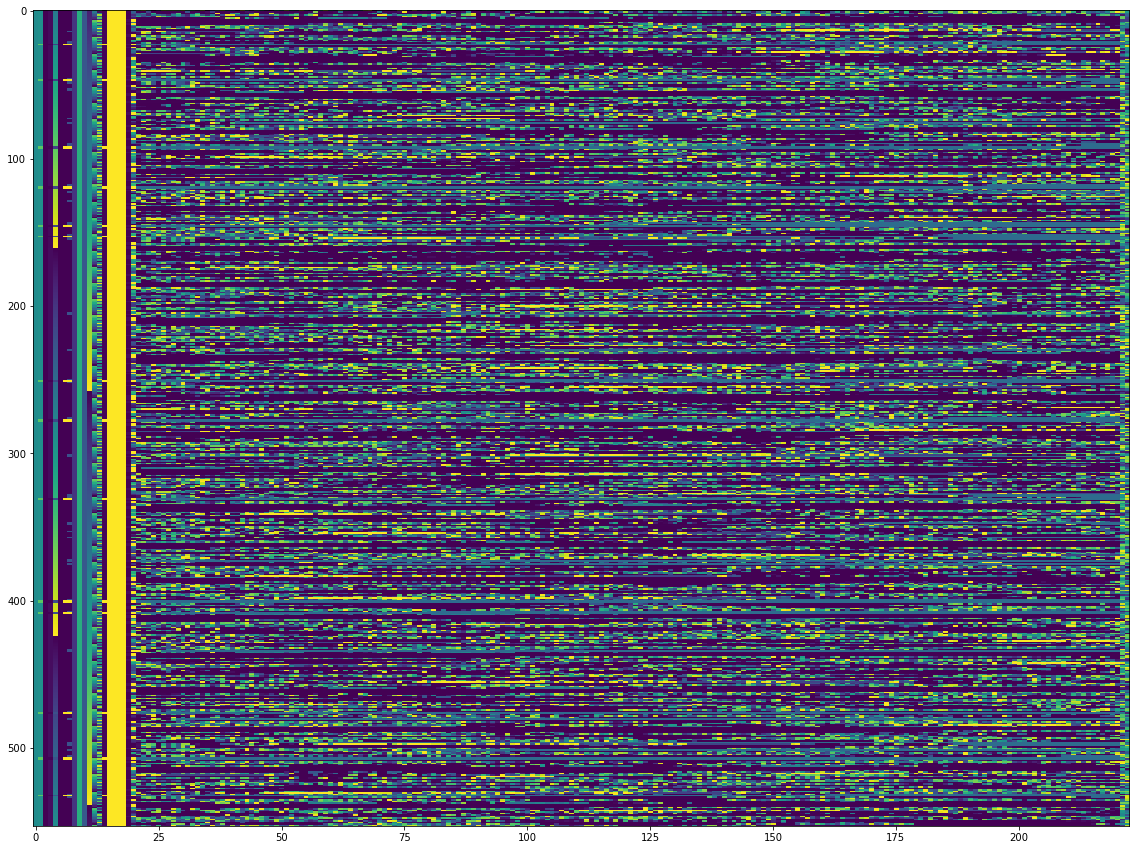

In [5]:
plt.figure(figsize = (30,15), facecolor = 'w')
plt.imshow(frames[:,:], interpolation = 'nearest', aspect = 0.3)

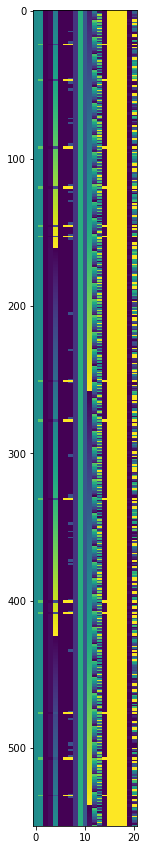

In [6]:
plt.figure(figsize = (30,15), facecolor = 'w')
plt.imshow(frames[:,:21], interpolation = 'nearest', aspect = 0.3)

In [7]:
set(frames[:,0])

{124}

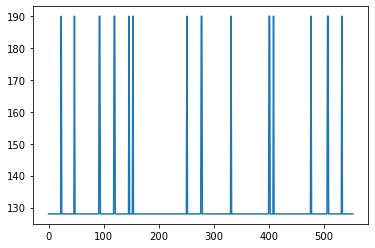

In [8]:
plt.plot(frames[:,1])

In [9]:
set(frames[:,1])

{128, 190}

In [10]:
typeA = frames[:,1] == 128
typeB = frames[:,1] == 190

In [11]:
set(frames[:,2])

{0}

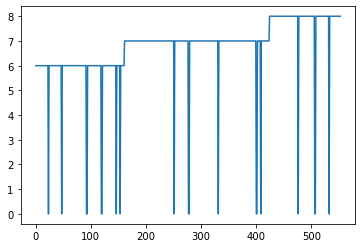

In [12]:
plt.plot(frames[:,3])

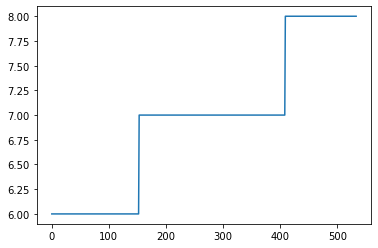

In [13]:
plt.plot(frames[typeA,3])

In [14]:
frames[typeB,3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

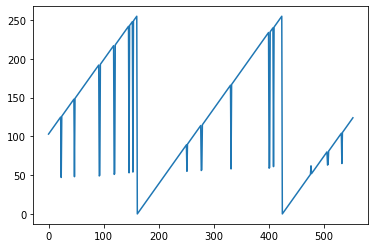

In [15]:
plt.plot(frames[:,4])

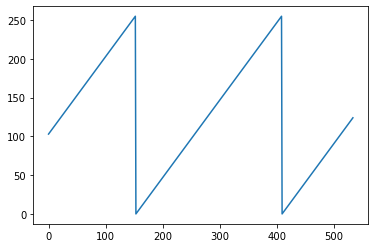

In [16]:
plt.plot(frames[typeA,4])

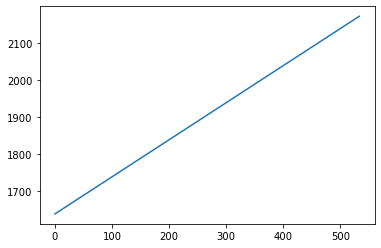

In [17]:
framecounter = frames[:,3:5].ravel().view('uint16').byteswap()
plt.plot(framecounter[typeA])

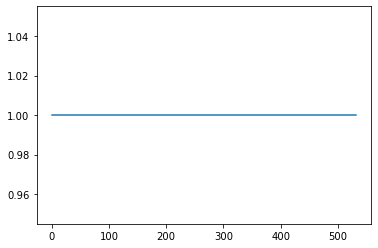

In [18]:
plt.plot(np.diff(framecounter[typeA]))

In [19]:
framecounter[typeB]

array([47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65], dtype=uint16)

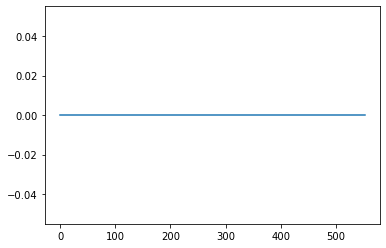

In [20]:
plt.plot(frames[:,5])

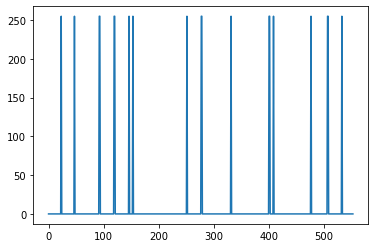

In [21]:
plt.plot(frames[:,6])

In [22]:
set(frames[typeA, 6])

{0}

In [23]:
set(frames[typeB, 6])

{255}

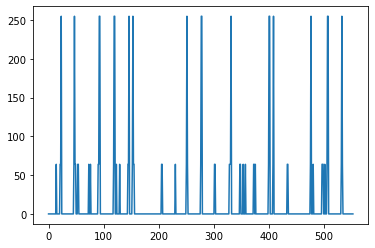

In [24]:
plt.plot(frames[:, 7])

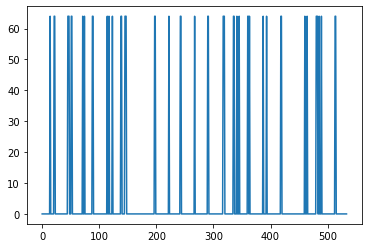

In [25]:
plt.plot(frames[typeA, 7])

In [26]:
set(frames[typeA, 7])

{0, 64}

In [27]:
set(frames[typeB, 7])

{255}

In [28]:
set(frames[:, 8])

{38}

In [29]:
set(frames[:, 9])

{160}

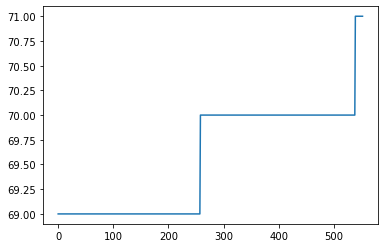

In [30]:
plt.plot(frames[:, 10])

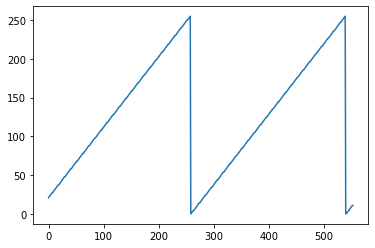

In [31]:
plt.plot(frames[:, 11])

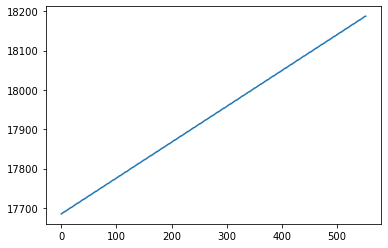

In [32]:
framecounter_global = frames[:,10:12].ravel().view('uint16').byteswap()
plt.plot(framecounter_global)

In [33]:
np.diff(framecounter_global)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

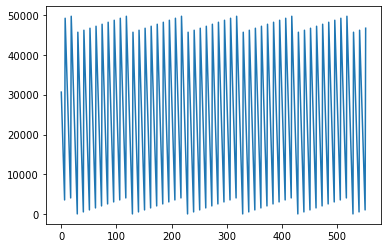

In [34]:
fast_counter = frames[:,12:14].ravel().view('uint16').byteswap()
plt.plot(fast_counter)

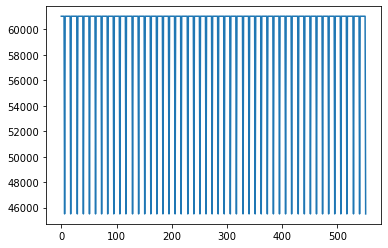

In [35]:
plt.plot(np.diff(fast_counter))

In [36]:
set(np.diff(fast_counter)[np.diff(framecounter_global) == 0])

{45500}

In [37]:
set(np.diff(fast_counter)[np.diff(framecounter_global) == 1])

{61036}

In [38]:
set(frames[typeA,14])

{3}

In [39]:
set(frames[typeB,14])

{255}

In [40]:
[set(frames[:, j]) for j in range(15,19)]

[{255}, {255}, {255}, {255}]

In [41]:
set(frames[:,19])

{0, 7}

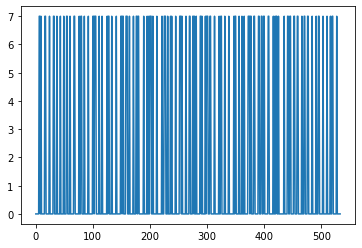

In [42]:
plt.plot(frames[typeA, 19])

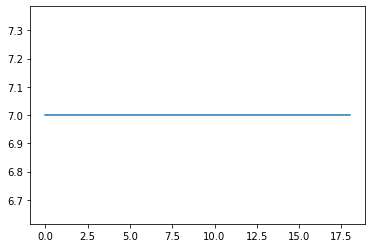

In [43]:
plt.plot(frames[typeB, 19])

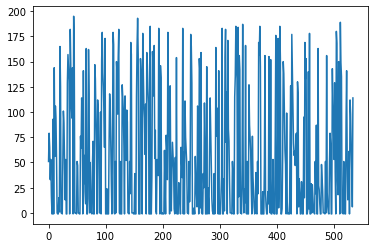

In [44]:
channel1 = frames[:, 19:21].ravel().view('int16').byteswap() << 5 >> 5
plt.plot(channel1[typeA])

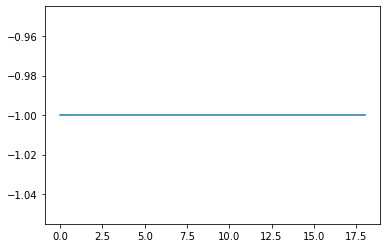

In [45]:
plt.plot(channel1[typeB])

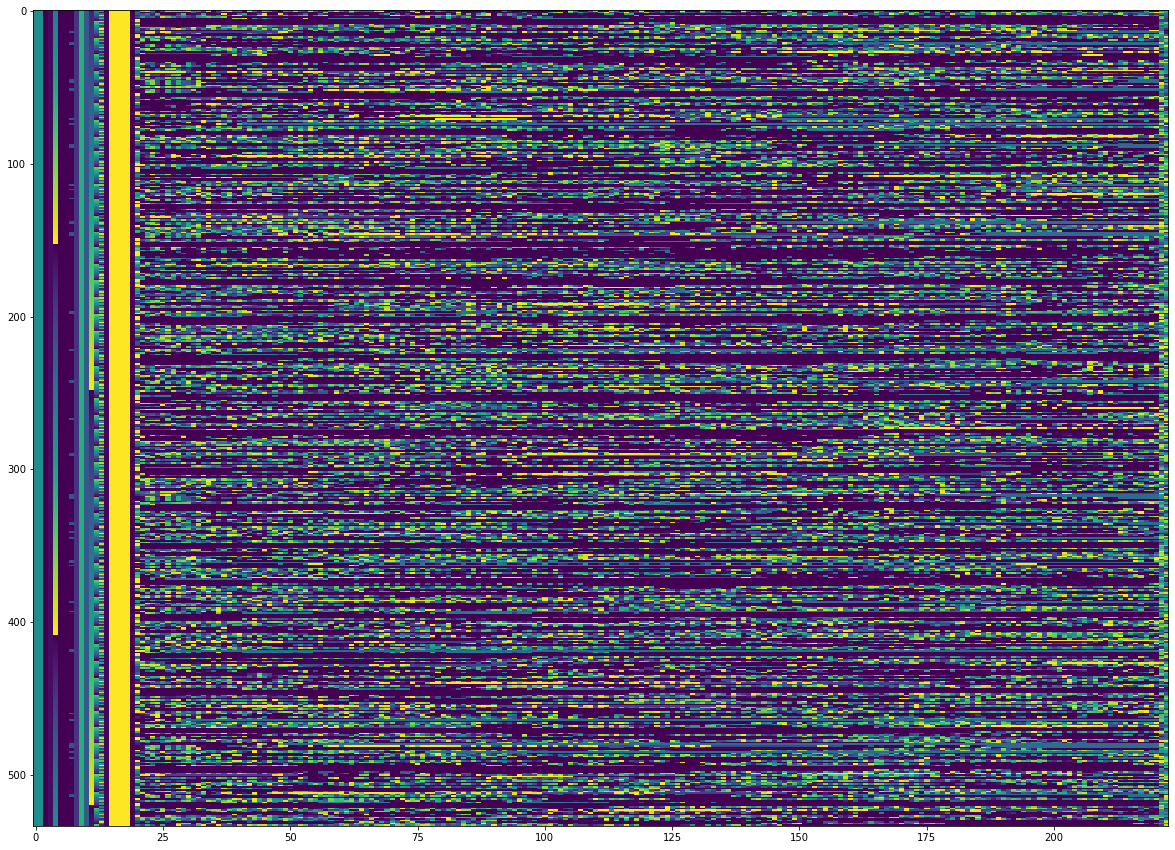

In [46]:
plt.figure(figsize = (30,15), facecolor = 'w')
plt.imshow(frames[frames[:,1]==128,:], interpolation = 'nearest', aspect = 0.3)

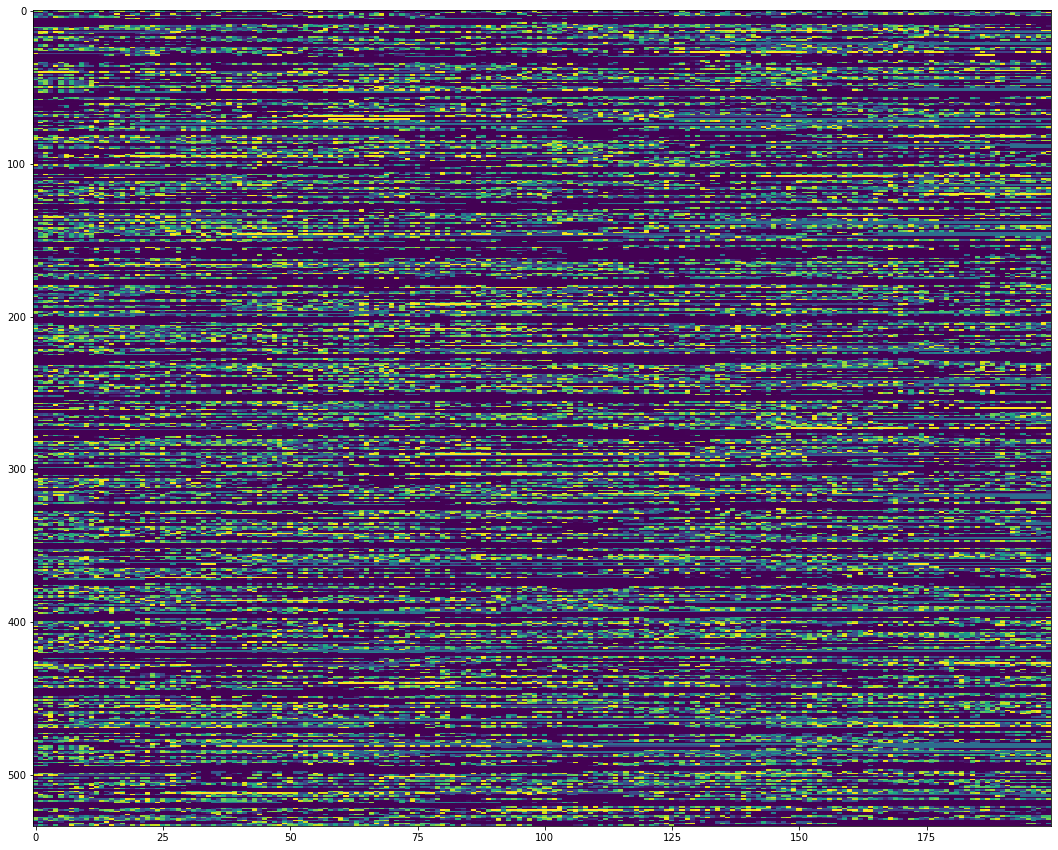

In [47]:
plt.figure(figsize = (30,15), facecolor = 'w')
plt.imshow(frames[frames[:,1]==128,21:-2], interpolation = 'nearest', aspect = 0.3)

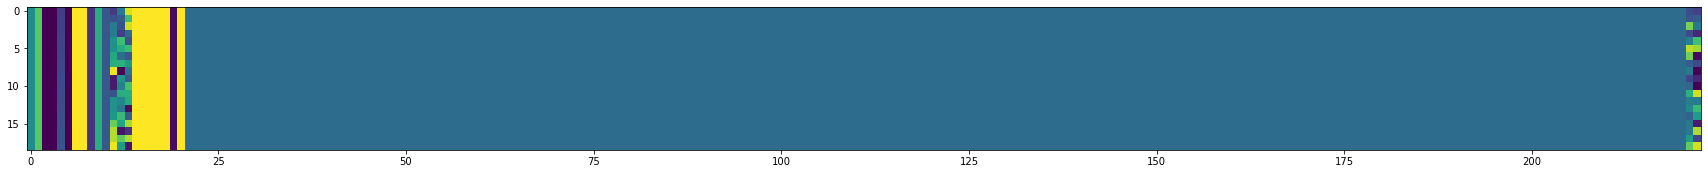

In [48]:
plt.figure(figsize = (30,15), facecolor = 'w')
plt.imshow(frames[frames[:,1]==190,:], interpolation = 'nearest', aspect = 1)

In [49]:
set(frames[frames[:,1]==190,21:-2].ravel())

{90}

In [50]:
data = frames[frames[:,1]==128,21:-2].ravel()

In [51]:
initial_on = bytes(data).find(b'initial_on.blk')

In [52]:
bytes(data[initial_on-200:][:400])

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\n\xf0\xc7\xf6\x00\x9d&\xa0E\x17s\xc7\x07\x00\x02\x00\x00\x01\x00\x01&\xa0E\x17&\xa0=A\x00\x00\x00\x00\x02\x00\t\x01\x00\x01\x00\x01\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0c\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x15\x00B\x00\x00FDC\x00\x00\x00\x00\x00&\xa0=,\x00A\x00\x00SEQ\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\n\xe0\xc7\xf9\x02\x9d&\xa0E\x19\rX\x01\x00\x01\xed\x00\x02\x01\x01initial_on.blk\x00\x00\x00\x00\x00\x00\x00\x00\x0b\xa0\x00\x00\x0e\x00&\xa0Ea\x00\x01\x01\x02\x00\x9e\x00\x01launch_comm_cfg.blk\x00\x00\x00\x04x\x00\x00\x04x\x00\x00\x00\x00\x00\x00\x00\x00\x00Z\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\